## Predicting Boston Housing Prices with Machine Learning

In this project, we evaluated the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis

In [11]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
df = pd.read_csv("Data/boston_corrected_raw.csv")

r_num=pd.read_csv('1e-12_tests.csv')
r_num=r_num[r_num['first variable']=='CMEDV']
feature_values=r_num.nlargest(3,'r')['second variable'].tolist()
r_num.nlargest(3,'r')

#Build crime and features dataframe
price=df['CMEDV']

features = df[['RM','LSTAT','PTRATIO']]
print(features.head())

      RM  LSTAT  PTRATIO
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7


Inspecting the aboved mentioned R figure, we found out that housing price shows close proportionality with several other features. Therefore we printed out all the numerical proportionality coeffecients and identified RM (i.e., Average numbers of rooms per dwelling), LSTAT (i.e., percentage values of lower status population), PTRATIO (i.e., pupil-teacher ratios per town).

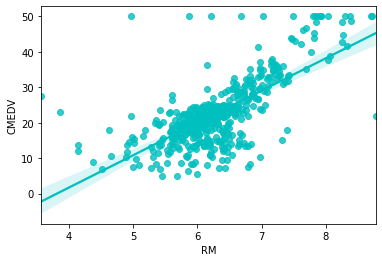

In [3]:
sns.regplot(x=features['RM'],y=price,color='c')
sns.set_style("whitegrid")

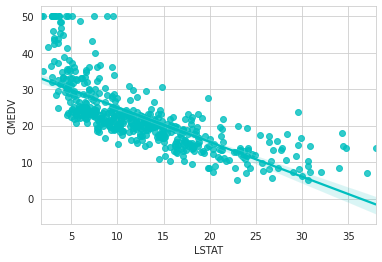

In [12]:
sns.regplot(x=features['LSTAT'],y=price,color='c')
sns.set_style("whitegrid")

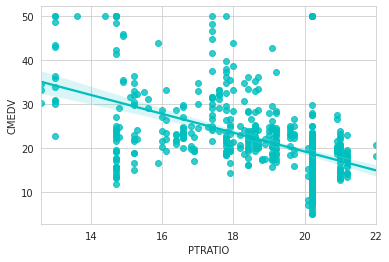

In [13]:
sns.regplot(x=features['PTRATIO'],y=price,color='c')
sns.set_style("whitegrid")

Here we printed three regression plots with price as y, and the features as x. They enhanced our confidence of their close relationship with the housing price.

# Developing a Model

# Performance Matics
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric. For this project, we calculated the coefficient of determination, R^2, to quantify the model's performance. The value for R^2 ranges from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

In [4]:
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score



# Split the Training Data
With help of the Python train_test_split function, we split the training data into a random state with testing data being 20 percent and training data being 80 percent of the total data set

In [5]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

features
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


# Analyzing Model Performance

The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the, the shaded regions of both the learning curves and the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

/home/jupyter-icdss_datathon/.local/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/jupyter-icdss_datathon/.local/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/jupyter-icdss_datathon/.local/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/jupyter-icdss_datathon/.local/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/jupyter-icdss_datathon/.local/lib/python3.7/site-packages/sklearn/metrics/_regression.

/home/jupyter-icdss_datathon/.local/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/jupyter-icdss_datathon/.local/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/jupyter-icdss_datathon/.local/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


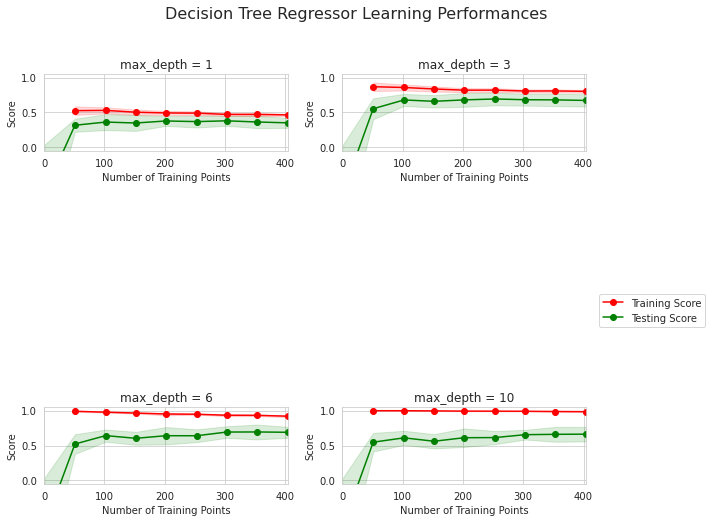

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, price)

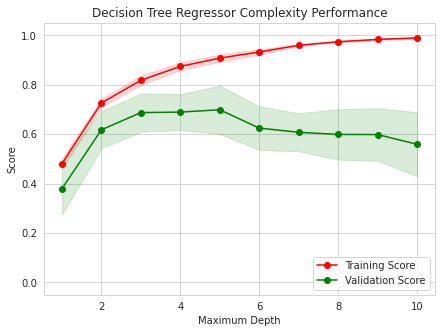

In [7]:

vs.ModelComplexity(X_train, y_train)

From the complexity curve, we can infer that the best maximum depth for the model is 4, as it is the one that yields the best validation score. In addition, for more depth although the training score increases, validation score tends to decrease which is a sign of overfitting.

# Implementing the Fitting Model
The final implementation requires bringing everything together and train a model using the decision tree algorithm. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree. The 'max_depth' parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called supervised learning algorithms.

In addition, we will find your implementation is using ShuffleSplit() for an alternative form of cross-validation (see the 'cv_sets' variable). The ShuffleSplit() implementation below will create 10 ('n_splits') shuffled sets, and for each shuffle, 20% ('test_size') of the data will be used as the validation set.

In [8]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


# Testing
We gave the parameters of three hypothetical clients to our model and compare the predictions to the statistics of the data set for the sake of testing. 

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]] # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted housing price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted housing price for Client 1's home: $20.22
Predicted housing price for Client 2's home: $9.31
Predicted housing price for Client 3's home: $48.42


In [23]:
# Minimum price of the data
minimum_price = np.amin(price)

# Maximum price of the data
maximum_price = np.amax(price)

# Mean price of the data
mean_price = np.mean(price)

# Median price of the data
median_price = np.median(price)

# Standard deviation of prices of the data
std_price = np.std(price)

# Show the calculated statistics
print("Statistics for housing price:\n")
print("Minimum housing price: ${}".format(minimum_price)) 
print("Maximum houseing price: ${}".format(maximum_price))
print("Mean housing price: ${}".format(mean_price))
print("Median housing price ${}".format(median_price))
print("Standard deviation of housing price: ${}".format(std_price))

Statistics for housing price:

Minimum housing price: $5.0
Maximum houseing price: $50.0
Mean housing price: $22.528853754940716
Median housing price $21.2
Standard deviation of housing price: $9.173098098551435


# Result

    •	The first thing we noticed is that the predicted housing price for the third client is far higher the the other clients and is near the maximun housing price. This is reasonable because out of the three clients, it has the greatest number of rooms, lowest percentage of lower status population around the area and the lowest number of pupil-teacher ratio in town. This house may be situated in a wealther neighborhood.
    •	For client 1, we can see that its features are intermediate between the latter 2, and therefore, its price is quite near the mean and median.
    •	Selling price for client 2 is the lowest of the three and given its features is reasonable as it is near the minimum of the dataset.

# Summary
The predictions of the model are in accord with our expectations